# Playing with Librosa
Tutorial followed from https://towardsdatascience.com/music-genre-classification-with-python-c714d032f0d8

In [1]:
! python -m pip install --user librosa

  Stored in directory: C:\Users\Ekansh\AppData\Local\pip\Cache\wheels\ce\49\68\87ba660f30e3977f0778e39ee2e944629cd37c2a0ce41f9ff1
  Stored in directory: C:\Users\Ekansh\AppData\Local\pip\Cache\wheels\b9\64\09\0b6417df9d8ba8bc61a7d2553c5cebd714ec169644c88fc012
  Stored in directory: C:\Users\Ekansh\AppData\Local\pip\Cache\wheels\ff\4f\ed\2e6c676c23efe5394bb40ade50662e90eb46e29b48324c5f9b
Successfully built librosa audioread resampy


In [1]:
import librosa
audio_path = 'E:/music_genre_classification/musicFile.mp3'
x, sr = librosa.load(audio_path)
# sample rate is how fast samples are taken
# A sample is a measurement at a specific time in the audio track in the form of bits (like a snapshot)
print(type(x), type(sr))

<class 'numpy.ndarray'> <class 'int'>


In [2]:
x.shape

(534528,)

In [3]:
# playing audio
import IPython.display as ipd
ipd.Audio(audio_path)

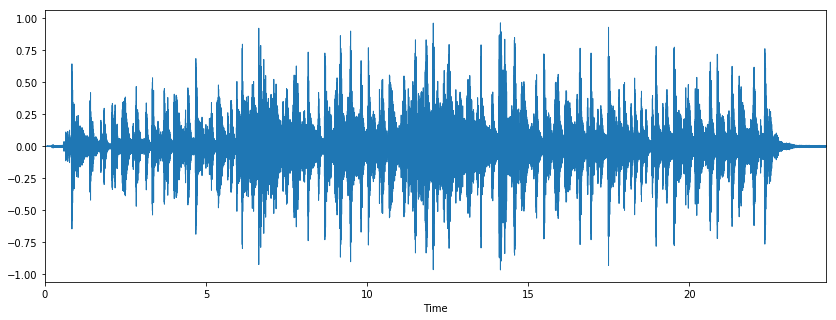

In [4]:
# visualising the amplitude envelope
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr = sr)

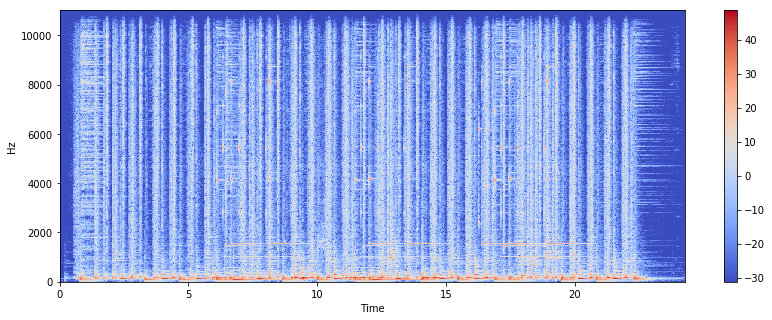

In [5]:
# visualising the frequency plot - spectogram
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize = (14, 5))
librosa.display.specshow(Xdb, sr = sr, x_axis = 'time', y_axis = 'hz')
plt.colorbar()

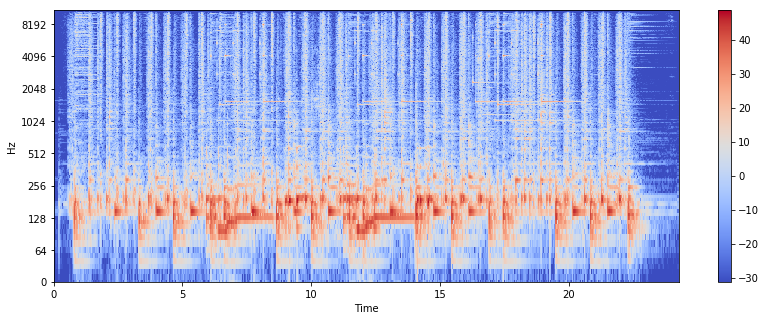

In [6]:
# Taking log of frequency because all the action is in the lower region
plt.figure(figsize = (14, 5))
librosa.display.specshow(Xdb, sr = sr, x_axis = 'time', y_axis = 'log')
plt.colorbar()

In [7]:
# creating our own audio signal
import numpy as np
sr = 22050 
T = 5 #seconds
t = np.linspace(0, T, int(T*sr), endpoint = False)
x = 0.5 * np.sin(2 * np.pi * 220 * t) #pure sine wave at 220 Hz

In [8]:
# playing the audio
ipd.Audio(x, rate = sr)

In [9]:
# saving as wav file
librosa.output.write_wav('tone_220.wav', x, sr)